## clas

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno


In [7]:
#load data
df= pd.read_csv("/Users/mac/Courses/10Alytics/heart.csv")

In [8]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [9]:
df.shape

(918, 12)

In [10]:
#investigate for missing value
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [11]:
# to ceck for missing value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [12]:
print("Sex", df["Sex"].unique())
print("ChestPainType", df["ChestPainType"].unique())
print("RestingECG", df["RestingECG"].unique())
print("ExerciseAngina", df["ExerciseAngina"].unique())
print("ST_Slope", df["ST_Slope"].unique())

Sex ['M' 'F']
ChestPainType ['ATA' 'NAP' 'ASY' 'TA']
RestingECG ['Normal' 'ST' 'LVH']
ExerciseAngina ['N' 'Y']
ST_Slope ['Up' 'Flat' 'Down']


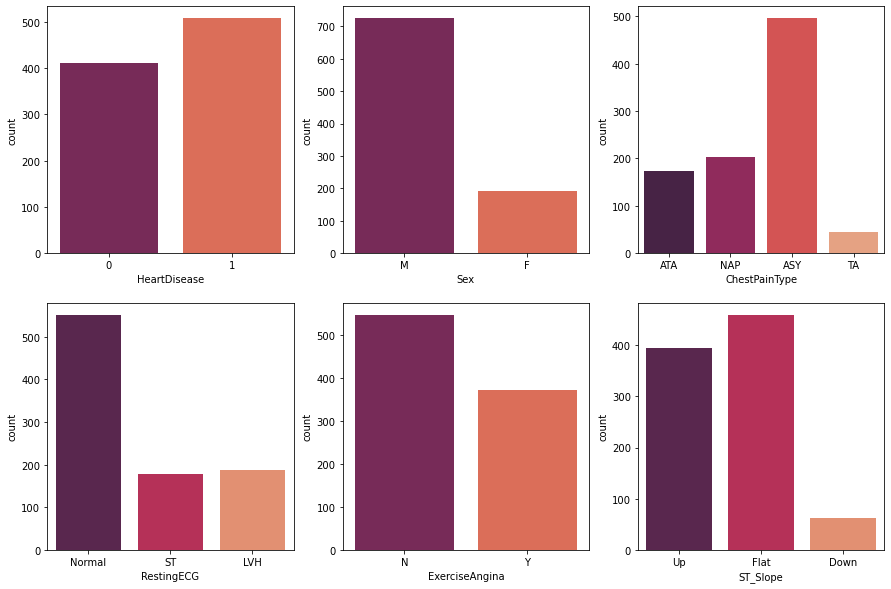

In [13]:
# create a subplot to visualize categorical data

f, axes = plt.subplots(2, 3, figsize=(15, 10))

sns.countplot(x = df["HeartDisease"], data=df, palette="rocket", ax = axes[0,0])
sns.countplot(x = df["Sex"], data=df, palette="rocket", ax = axes[0,1])
sns.countplot(x = df["ChestPainType"], data=df, palette="rocket", ax = axes[0,2])

sns.countplot(x = df["RestingECG"], data=df, palette="rocket", ax = axes[1, 0])
sns.countplot(x = df["ExerciseAngina"], data=df, palette="rocket", ax = axes[1,1])
sns.countplot(x = df["ST_Slope"], data=df, palette="rocket", ax = axes[1,2])

plt.show()

/Users/mac/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


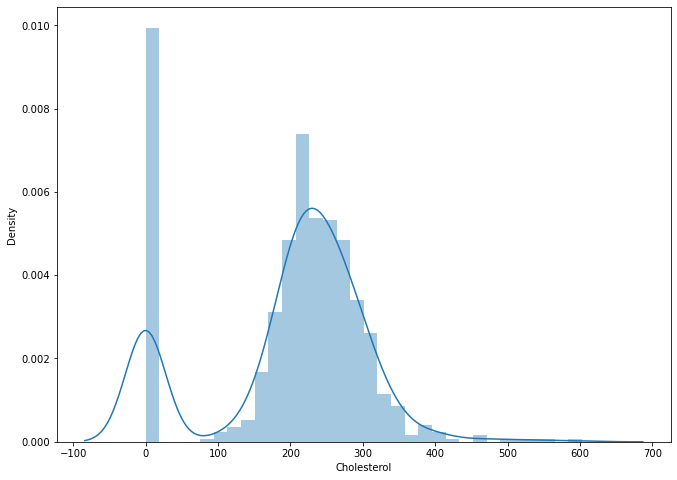

In [14]:
#investigate the distribution of some numerical features

#cholesterol
plt.figure(figsize=(11, 8))
sns.distplot(df["Cholesterol"])
plt.show()

<Figure size 792x576 with 0 Axes>

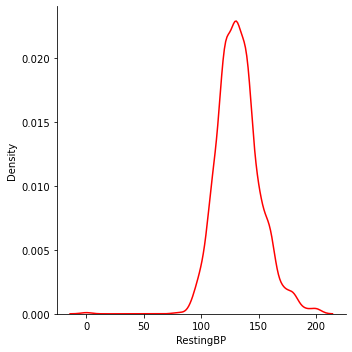

In [15]:
#restingBP
plt.figure(figsize=(11, 8))
sns.displot(df["RestingBP"], color="red", kind="kde")
plt.show()

# Machine Learning - Heart Data

In [16]:
#Transform categorical data into numerical data -  Using label Encoder(Scikit-Learn)
from sklearn.preprocessing import LabelEncoder

In [17]:
le = LabelEncoder()

In [18]:
# transformation process
df["Sex"] = le.fit_transform(df["Sex"])
df["ChestPainType"] = le.fit_transform(df["ChestPainType"])
df["RestingECG"] = le.fit_transform(df["RestingECG"])
df["ExerciseAngina"] = le.fit_transform(df["ExerciseAngina"])
df["ST_Slope"] = le.fit_transform(df["ST_Slope"])

df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


<AxesSubplot:>

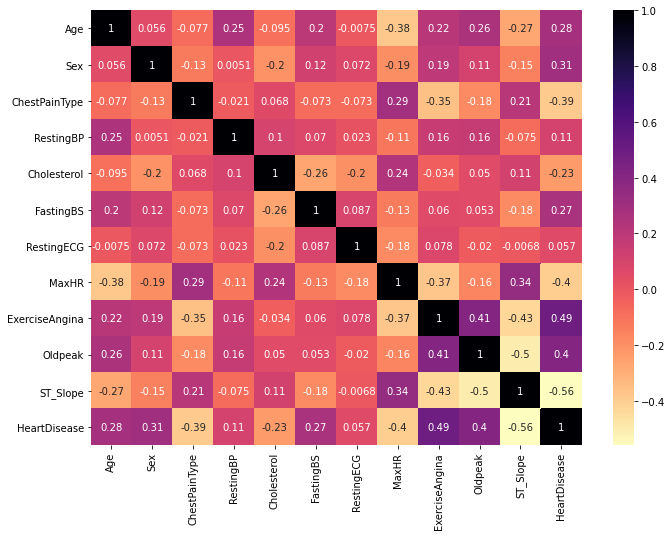

In [19]:
# Correlation- what value are related.  finding out factor that can affect certain value...
# checking if a variable has either postive or negative relationship
plt.figure(figsize = (11, 8))
sns.heatmap(df.corr(), annot=True, cmap="magma_r")

In [20]:

# remove the label you wanna predict
x = df.drop("HeartDisease", axis =1) #Dataset without the Label (HEart Disease)

y = df["HeartDisease"] # this is the labeled removed

In [21]:
# split dataset into a train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.4)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

X_train:  (550, 11)
X_test:  (368, 11)
y_train:  (550,)
y_test:  (368,)


In [22]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier()

In [23]:
#using Adabosst algo to predict people that will have heart disease and people who wont have it
model = abc.fit(X_train, y_train)

In [24]:
#Confirm AdaBoostclassifier prediction
pred = model.predict(X_test)
print(pred)

[0 0 1 0 0 0 1 1 0 0 1 1 0 0 1 0 1 1 0 1 1 1 0 0 1 1 0 1 0 1 1 0 1 1 1 1 0
 0 1 1 1 0 0 1 1 0 1 0 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 1
 0 1 0 0 1 0 0 1 0 0 1 1 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0
 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 0 1 1 1 0 1 0 0 0 0
 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 0 1 1 1 0 1 1 0 0 1 0 0 0 1 0 0 1 0
 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 0 1 1 1 1 1 1 1 0 1 0 1
 1 1 0 0 0 1 1 0 1 1 0 1 1 0 0 1 1 0 1 1 1 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 0
 1 0 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 0 0 0 1 1 0 1 1 1 1 0 0 0 0 1 0 1 1 1
 1 0 0 1 0 1 0 1 0 1 1 0 1 0 1 1 0 1 0 1 0 1 0 0 1 1 1 1 1 0 1 1 0 1 1 0 0
 1 0 1 0 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 0 1 0 0 0 1 0 0 0 0 1 1 1 1 1 0]


In [25]:
# to see how accurate Adaboost was able to predict
from sklearn.metrics import accuracy_score
print("The accuracy for Adaboost is: ", round(accuracy_score(y_test, pred)*100),"%")

The accuracy for Adaboost is:  84 %


In [24]:
!pip3 install xgboost

In [26]:
# Lets apply another algorithm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

#machine learning metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

In [27]:
classifiers = [
    [RandomForestClassifier(), "Random Forest"],
    [XGBClassifier(), "XGB Classifier"],
    [KNeighborsClassifier(), "K-Nearest Neighbors"],
    [SGDClassifier(), "SGD"],
    [SVC(), "Support Vector Machine"],
    [GaussianNB(), "Naive Bayes"],
    [DecisionTreeClassifier(), "Decision Tree"],
    [LogisticRegression(), "Logistics Regression"]
]

In [28]:
score_list = {}
cross_val = {}
roc_auc = {}
accuracy_s = {}
for i in classifiers:
    model = i[0]
    model.fit(X_train, y_train)
    model_name = i[1]
    pred = model.predict(X_test)
    score = model.score(X_test, y_test)
    CV = cross_val_score(model, X_test, y_test).mean()
    RA = roc_auc_score(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    score_list[model_name] = ([str(round(score*100, 2)) + "%"])
    cross_val[model_name] = ([str(round(CV *100, 2)) + '%'])
    accuracy_s[model_name] = ([str(round(accuracy*100, 2)) + "%"])
    roc_auc[model_name] = ([str(round(RA*100, 2)) + "%"])
    if model_name != classifiers[-1][1]:
        print("")


[12:22:52] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:22:52] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/mac/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:

[12:22:52] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:22:52] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/mac/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:22:52] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:22:52] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.








/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

In [29]:
print("Accuracy Score")
AS = pd.DataFrame(score_list)
AS.head()

Accuracy Score


,Random Forest,XGB Classifier,K-Nearest Neighbors,SGD,Support Vector Machine,Naive Bayes,Decision Tree,Logistics Regression
0,86.41%,84.24%,72.01%,68.48%,73.1%,84.78%,79.08%,83.97%


In [31]:
print("Cross Validation")
AS = pd.DataFrame(cross_val)
AS.head()

Cross Validation


,Random Forest,XGB Classifier,K-Nearest Neighbors,SGD,Support Vector Machine,Naive Bayes,Decision Tree,Logistics Regression
0,86.42%,87.49%,75.81%,61.95%,72.03%,84.24%,78.8%,85.6%


In [33]:
print("roc_auc_list")
AS = pd.DataFrame(roc_auc)
AS.head()

roc_auc_list


,Random Forest,XGB Classifier,K-Nearest Neighbors,SGD,Support Vector Machine,Naive Bayes,Decision Tree,Logistics Regression
0,86.0%,83.85%,71.62%,69.59%,72.79%,84.67%,78.76%,83.71%
